In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_pickle('maindalemma_wo_langs.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'maindalemma_wo_langs.pkl'

In [ ]:
df.head()

In [47]:
# create train and test (80/20 split) from the orginal dataframe
train, test = train_test_split(df, test_size=0.2, random_state=123)
# create train and validate (75/25 split) from the train dataframe
train, val = train_test_split(train, test_size=.25, random_state=123)

In [48]:
train.shape, val.shape, test.shape

((359, 4), (120, 4), (120, 4))

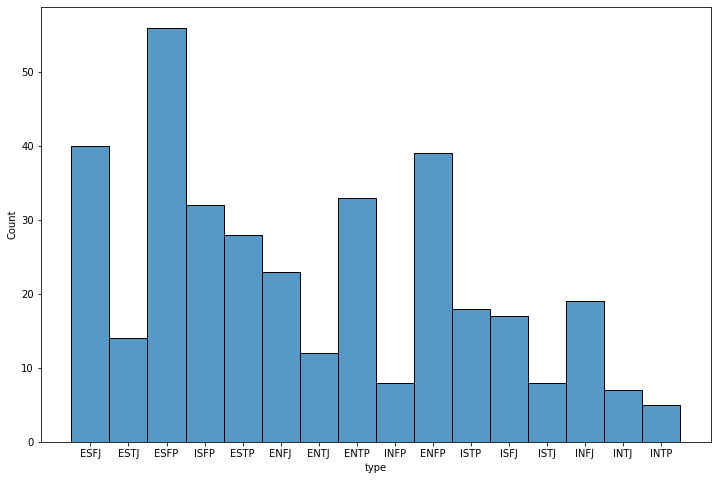

In [49]:
plt.figure(figsize=(12,8))
sns.histplot(train, x='type')
plt.show()

In [50]:
new_list = []
for spot in train['type']:
        if (spot == 'INTJ') | (spot == 'ENTJ') | (spot == 'INTP') | (spot == 'ENTP'):
            new_list.append('analyst')
        if (spot == 'INFJ') | (spot == 'ENFJ') | (spot == 'INFP') | (spot == 'ENFP'):
            new_list.append('diplomat')
        if (spot == 'ISTJ') | (spot == 'ESTJ') | (spot == 'ISFJ') | (spot == 'ESFJ'):
            new_list.append('sentinel')
        if (spot == 'ISTP') | (spot == 'ESTP') | (spot == 'ISFP') | (spot == 'ESFP'):
            new_list.append('explorer')
train['domain'] = new_list

In [51]:
train['i_e'] = np.where(train['type'].str[0] == 'I', 0, 1)
train['s_n'] = np.where(train['type'].str[1] == 'S', 0, 1)
train['f_t'] = np.where(train['type'].str[2] == 'F', 0, 1)
train['p_j'] = np.where(train['type'].str[3] == 'P', 0, 1)

In [52]:
train.head()

,type,name,stoped_lemma,freq,domain,i_e,s_n,f_t,p_j
548,ESFJ,lucy hale,cute day delicate amp strong hating game dude ...,"{'amp': 18, 'thank': 10, 'nyre': 8, 'year': 8,...",sentinel,1,0,0,1
115,ESTJ,luna maya,day japan tokyo japan posted photo jakarta sak...,"{'jakarta': 12, 'photo': 10, 'seoul': 10, 'kor...",sentinel,1,0,1,1
212,ESFP,paulo coelho,dois grande humano disso trata filme postei na...,"{'obrigado': 6, 'nao': 6, 'pai': 4, 'deaalves'...",explorer,1,0,0,0
420,ISFP,pharrell williams,atlanta feat trvisxx pre save lesson blessing ...,"{'cash': 16, 'sitw': 13, 'trvisxx': 6, 'sitwfe...",explorer,0,0,0,0
90,ESTP,james maslow,miri rusher still road trippin skelton onesie ...,"{'thanks': 8, 'tour': 6, 'israel': 6, 'going':...",explorer,1,0,1,0


In [53]:
train.i_e.value_counts(), train.s_n.value_counts(), train.f_t.value_counts(), train.p_j.value_counts()

(1    245
 0    114
 Name: i_e, dtype: int64,
 0    213
 1    146
 Name: s_n, dtype: int64,
 0    234
 1    125
 Name: f_t, dtype: int64,
 0    219
 1    140
 Name: p_j, dtype: int64)

<AxesSubplot:xlabel='domain', ylabel='Count'>

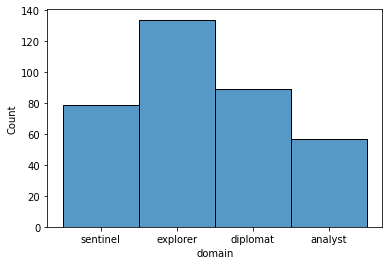

In [54]:
sns.histplot(train, x='domain')

In [55]:
pd.crosstab(train['i_e'], train['domain'])

domain,analyst,diplomat,explorer,sentinel
i_e,,,,
0,12,27,50,25
1,45,62,84,54


In [56]:
import nltk.sentiment

In [57]:
s = nltk.sentiment.SentimentIntensityAnalyzer()

In [58]:
train['sentiment'] = train.stoped_lemma.apply(lambda doc: s.polarity_scores(doc)['compound'])

In [59]:
train

,type,name,stoped_lemma,freq,domain,i_e,s_n,f_t,p_j,sentiment
548,ESFJ,lucy hale,cute day delicate amp strong hating game dude ...,"{'amp': 18, 'thank': 10, 'nyre': 8, 'year': 8,...",sentinel,1,0,0,1,0.9996
115,ESTJ,luna maya,day japan tokyo japan posted photo jakarta sak...,"{'jakarta': 12, 'photo': 10, 'seoul': 10, 'kor...",sentinel,1,0,1,1,0.9932
212,ESFP,paulo coelho,dois grande humano disso trata filme postei na...,"{'obrigado': 6, 'nao': 6, 'pai': 4, 'deaalves'...",explorer,1,0,0,0,0.9920
420,ISFP,pharrell williams,atlanta feat trvisxx pre save lesson blessing ...,"{'cash': 16, 'sitw': 13, 'trvisxx': 6, 'sitwfe...",explorer,0,0,0,0,0.9942
90,ESTP,james maslow,miri rusher still road trippin skelton onesie ...,"{'thanks': 8, 'tour': 6, 'israel': 6, 'going':...",explorer,1,0,1,0,0.9984
...,...,...,...,...,...,...,...,...,...,...
580,ESFJ,tom daley,heres ver nstitch stitch mission help everyone...,"{'ad': 14, 'watch': 11, 'check': 10, 'amp': 10...",sentinel,1,0,0,1,0.9997
350,ENFP,ozzy osbourne,happy ing oct trick treat n bark moon hd youtu...,"{'ozzy': 42, 'n': 37, 'august': 9, 'find': 8, ...",diplomat,1,1,0,0,0.9939
440,ISFP,shreya ghoshal,excited share new song amazing along nits firs...,"{'thank': 19, 'song': 14, 'n': 12, 'us': 8, 'p...",explorer,0,0,0,0,0.9999
554,ESFJ,angelica huck,brasil venceu povo venceu nviva caminho longo ...,"{'semana': 20, 'nao': 16, 'dia': 14, 'mina': 1...",sentinel,1,0,0,1,0.9698


In [60]:
train[train.i_e == 0].sentiment.mean(), train[train.i_e == 1].sentiment.mean()

(0.9100596491228067, 0.8629832653061216)

In [61]:
train[train.s_n == 0].sentiment.mean(), train[train.s_n == 1].sentiment.mean()

(0.8815338028169004, 0.8726780821917802)

In [62]:
train[train.f_t == 0].sentiment.mean(), train[train.f_t == 1].sentiment.mean()

(0.917649999999999, 0.8035807999999998)

In [63]:
train[train.p_j == 0].sentiment.mean(), train[train.p_j == 1].sentiment.mean()

(0.8762442922374423, 0.8805728571428563)

In [64]:
train[train.type == 'ENTP'].sentiment.mean(), train[train.type == 'ISFJ'].sentiment.mean()

(0.7863757575757577, 0.9632941176470589)

In [65]:
{'diplomat':train[train.domain == 'diplomat'].sentiment.mean(), 
 'explorer':train[train.domain == 'explorer'].sentiment.mean(), 
 'analyst':train[train.domain == 'analyst'].sentiment.mean(),
 'sentinel':train[train.domain == 'sentinel'].sentiment.mean()}

{'diplomat': 0.9035303370786516,
 'explorer': 0.8724873134328356,
 'analyst': 0.8245052631578946,
 'sentinel': 0.896878481012658}

In [66]:
train['message_length'] = train['stoped_lemma'].str.len()

In [67]:
train['word_count'] = train['stoped_lemma'].str.split(' ').apply(len)

In [68]:
train.head()

,type,name,stoped_lemma,freq,domain,i_e,s_n,f_t,p_j,sentiment,message_length,word_count
548,ESFJ,lucy hale,cute day delicate amp strong hating game dude ...,"{'amp': 18, 'thank': 10, 'nyre': 8, 'year': 8,...",sentinel,1,0,0,1,0.9996,3769,610
115,ESTJ,luna maya,day japan tokyo japan posted photo jakarta sak...,"{'jakarta': 12, 'photo': 10, 'seoul': 10, 'kor...",sentinel,1,0,1,1,0.9932,2652,438
212,ESFP,paulo coelho,dois grande humano disso trata filme postei na...,"{'obrigado': 6, 'nao': 6, 'pai': 4, 'deaalves'...",explorer,1,0,0,0,0.9920,3571,567
420,ISFP,pharrell williams,atlanta feat trvisxx pre save lesson blessing ...,"{'cash': 16, 'sitw': 13, 'trvisxx': 6, 'sitwfe...",explorer,0,0,0,0,0.9942,1741,276
90,ESTP,james maslow,miri rusher still road trippin skelton onesie ...,"{'thanks': 8, 'tour': 6, 'israel': 6, 'going':...",explorer,1,0,1,0,0.9984,3197,524


/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='message_length', ylabel='sentiment'>

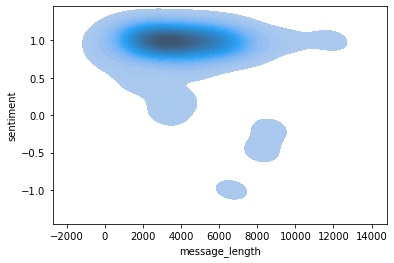

In [69]:
sns.kdeplot(train[train.domain == 'diplomat'].message_length, train[train.domain == 'diplomat'].sentiment, levels=30, shade=True)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='message_length', ylabel='sentiment'>

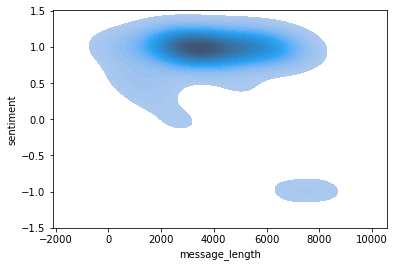

In [70]:
sns.kdeplot(train[train.domain == 'sentinel'].message_length, train[train.domain == 'sentinel'].sentiment, levels=30, shade=True)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='message_length', ylabel='sentiment'>

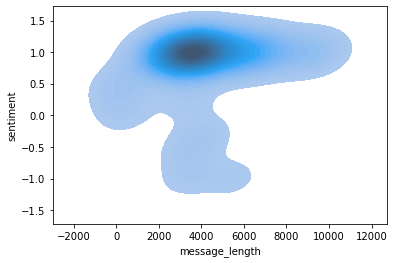

In [71]:
sns.kdeplot(train[train.domain == 'analyst'].message_length, train[train.domain == 'analyst'].sentiment, levels=30, shade=True)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='message_length', ylabel='sentiment'>

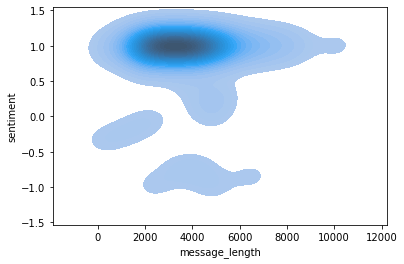

In [72]:
sns.kdeplot(train[train.domain == 'explorer'].message_length, train[train.domain == 'explorer'].sentiment, levels=30, shade=True)